<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/MachineLearningBook/Chapter10/Building_a_Regression_MLP_Using_the_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

In [0]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


In [19]:
print(X_train[:4])

[[ 6.16010000e+00  2.60000000e+01  6.39540816e+00  1.00255102e+00
   1.33300000e+03  3.40051020e+00  3.36700000e+01 -1.17900000e+02]
 [ 2.18100000e+00  3.70000000e+01  4.67732558e+00  1.08720930e+00
   1.17300000e+03  3.40988372e+00  3.67100000e+01 -1.19560000e+02]
 [ 6.04710000e+00  1.70000000e+01  6.53584906e+00  9.79245283e-01
   1.71300000e+03  3.23207547e+00  3.36100000e+01 -1.17660000e+02]
 [ 3.89000000e+00  3.60000000e+01  5.80547112e+00  1.06990881e+00
   1.59300000e+03  4.84194529e+00  3.37200000e+01 -1.17880000e+02]]


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=30, batch_size=10,validation_data = (X_valid, y_valid))



Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 195us/sample - loss: 4.5790 - val_loss: 115.8142
Epoch 2/30
11610/11610 [==============================] - 2s 134us/sample - loss: 1.8718 - val_loss: 1.1921
Epoch 3/30
11610/11610 [==============================] - 2s 135us/sample - loss: 0.5130 - val_loss: 1.4245
Epoch 4/30
11610/11610 [==============================] - 2s 132us/sample - loss: 0.4577 - val_loss: 0.8261
Epoch 5/30
11610/11610 [==============================] - 2s 131us/sample - loss: 0.4358 - val_loss: 0.6579
Epoch 6/30
11610/11610 [==============================] - 2s 135us/sample - loss: 0.4152 - val_loss: 0.4596
Epoch 7/30
11610/11610 [==============================] - 2s 130us/sample - loss: 0.4077 - val_loss: 0.9672
Epoch 8/30
11610/11610 [==============================] - 2s 130us/sample - loss: 0.3998 - val_loss: 0.9555
Epoch 9/30
11610/11610 [==============================] - 2s 131us/sample - loss: 0.3

In [34]:
history.params

{'batch_size': 10,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'val_loss'],
 'samples': 11610,
 'steps': None,
 'verbose': 0}

In [35]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

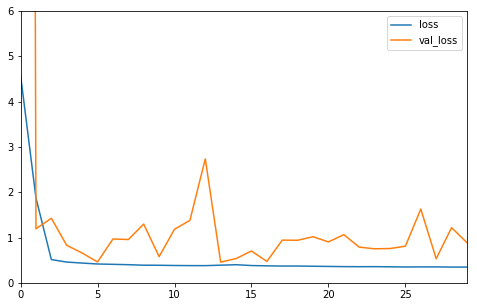

In [43]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5),ylim=(0,6))

In [42]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 27us/sample - loss: 3.1773


3.1772705566051394